In [1]:
import os
import sys
import pandas as pd

In [2]:
data = os.path.abspath(os.path.join('.','data', 'data.csv'))

In [3]:
df= pd.read_csv(data)

In [4]:
df.head()

,Channel,AuthorID,Author,Date,Content,Attachments,Reactions
0,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,369700858742571008,mantisclone,03/29/2023 1:02 AM,gm 👋 :Water_Wave: :Oceancopy:,NaN,NaN
1,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,843831770062913568,white_rider_,03/29/2023 4:37 PM,Good morning to all the @🧑‍💻Builder 🌊,NaN,NaN
2,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,563434444321587202,Maki#4920,03/29/2023 4:37 PM,**@White Rider just advanced to level 4!**,https://cdn.discordapp.com/attachments/1088751...,powerup (1)
3,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,194817764236460034,robinlehmann,03/29/2023 4:40 PM,https://tenor.com/view/hello-there-baby-yoda-m...,NaN,babyyodasoup (1)
4,Ocean Protocol - CORE-TECH - 🌊┃builders [10887...,387401160656683034,birususama,03/29/2023 4:40 PM,Good morning everyone 😀,NaN,🌅 (1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Channel      84754 non-null  object
 1   AuthorID     84754 non-null  int64 
 2   Author       84754 non-null  object
 3   Date         84754 non-null  object
 4   Content      64609 non-null  object
 5   Attachments  1959 non-null   object
 6   Reactions    6073 non-null   object
dtypes: int64(1), object(6)
memory usage: 4.5+ MB


In [6]:
df.columns

Index(['Channel', 'AuthorID', 'Author', 'Date', 'Content', 'Attachments',
       'Reactions'],
      dtype='object')

In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84754 entries, 0 to 84753
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Channel      84754 non-null  object        
 1   AuthorID     84754 non-null  int64         
 2   Author       84754 non-null  object        
 3   Date         84754 non-null  datetime64[ns]
 4   Content      64609 non-null  object        
 5   Attachments  1959 non-null   object        
 6   Reactions    6073 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 4.5+ MB


### Number of messages per day

In [9]:
messages_per_day = df.groupby(df['Date'].dt.date)['Content'].count()
messages_per_day

Date
2019-08-20     3
2019-08-21     2
2019-08-22    16
2019-08-23     1
2019-08-24     1
              ..
2024-02-16    12
2024-02-17    15
2024-02-18    41
2024-02-19    45
2024-02-20    45
Name: Content, Length: 1537, dtype: int64

In [10]:
# Find the date with the maximum number of messages
max_date = messages_per_day.idxmax()
max_messages = messages_per_day.max()

# Find the date with the minimum number of messages
min_date = messages_per_day.idxmin()
min_messages = messages_per_day.min()

In [11]:
max_date,max_messages

(datetime.date(2022, 7, 5), 3202)

In [12]:
min_date, min_messages

(datetime.date(2019, 8, 23), 1)

### Plot number of messages per year

C:\Users\ProBook\AppData\Local\Temp\ipykernel_10052\2557039025.py:9: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  messages_per_year = messages_per_day.resample('Y').sum()


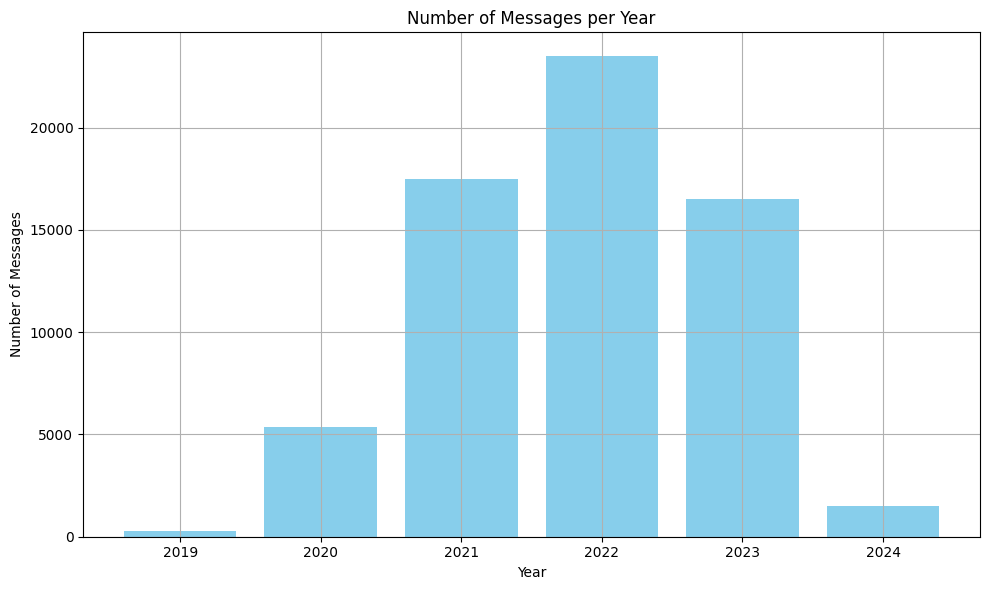

In [13]:
import matplotlib.pyplot as plt

# Assuming you have already computed the messages_per_day Series

# Convert the index to a datetime object
messages_per_day.index = pd.to_datetime(messages_per_day.index)

# Group the data by year and sum the number of messages for each year
messages_per_year = messages_per_day.resample('Y').sum()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(messages_per_year.index.year, messages_per_year.values, color='skyblue')

# Adding labels and title
plt.title('Number of Messages per Year')
plt.xlabel('Year')
plt.ylabel('Number of Messages')

# Display the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Plot number of messages per monthly

C:\Users\ProBook\AppData\Local\Temp\ipykernel_10052\3988226293.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  messages_per_month = messages_per_day.resample('M').sum()


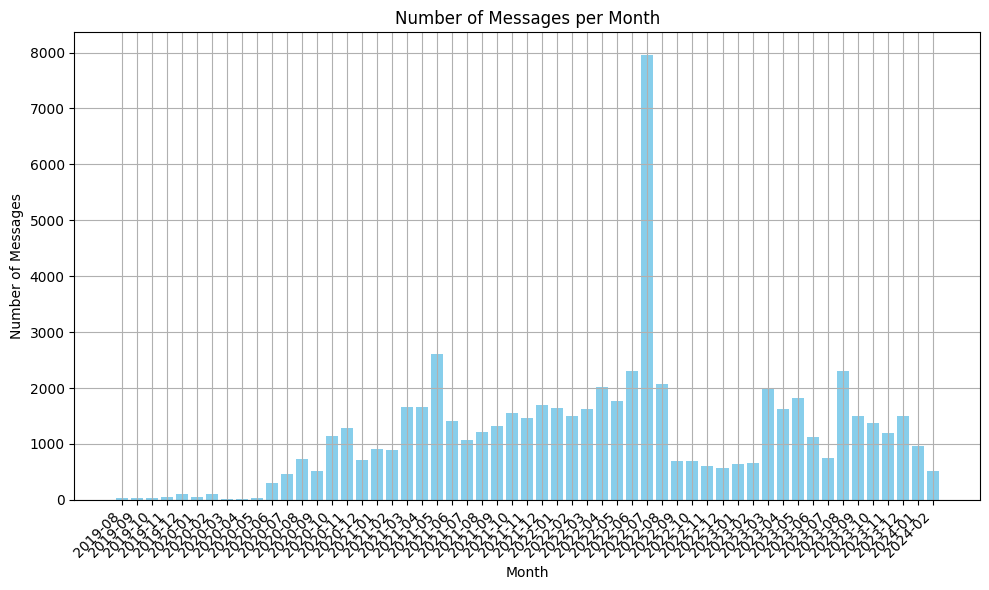

In [14]:
# Group the data by month and sum the number of messages for each month
messages_per_month = messages_per_day.resample('M').sum()

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(messages_per_month.index.strftime('%Y-%m'), messages_per_month.values, color='skyblue')

# Adding labels and title
plt.title('Number of Messages per Month')
plt.xlabel('Month')
plt.ylabel('Number of Messages')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Plot number of messages per weekly top 10

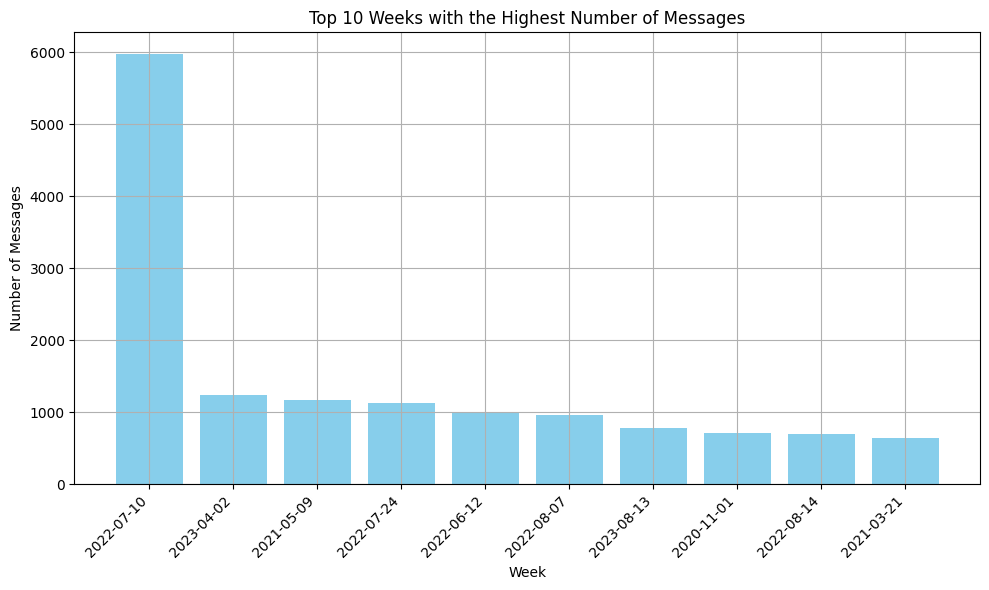

In [15]:
# Group the data by week and sum the number of messages for each week
messages_per_week = messages_per_day.resample('W').sum()

# Sort the messages_per_week Series by the number of messages in descending order
sorted_messages_per_week = messages_per_week.sort_values(ascending=False)

# Select the top 10 weeks
top_10_weeks = sorted_messages_per_week.head(10)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
plt.bar(top_10_weeks.index.strftime('%Y-%m-%d'), top_10_weeks.values, color='skyblue')

# Adding labels and title
plt.title('Top 10 Weeks with the Highest Number of Messages')
plt.xlabel('Week')
plt.ylabel('Number of Messages')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()
